### 1. Setup 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### 2. Load Data

In [26]:
BostonData = load_boston()
print(BostonData.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
X_Boston,y_Boston = load_boston(return_X_y=True)

In [28]:
X_Boston = pd.DataFrame(X_Boston,columns=BostonData.feature_names)
y_Boston = pd.Series(y_Boston,name='MEDV')

In [29]:
X_Boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [30]:
y_Boston.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

### 3. Cleaning, Preprocessing

#### a. Drop duplicates, NA

In [31]:
X_Boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [32]:
y_Boston.isna().sum()

0

In [33]:
shape_X = X_Boston.shape
print(shape_X)
X_Boston2 = X_Boston.drop_duplicates()
print(X_Boston2.shape)

(506, 13)
(506, 13)


In [34]:
del X_Boston2

In [35]:
X_Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [36]:
y_Boston.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

### 4. Feature Engineering

#### a. Hist plots of each feature & corr plot

In [37]:
BostonData = pd.concat([X_Boston,y_Boston],axis=1)

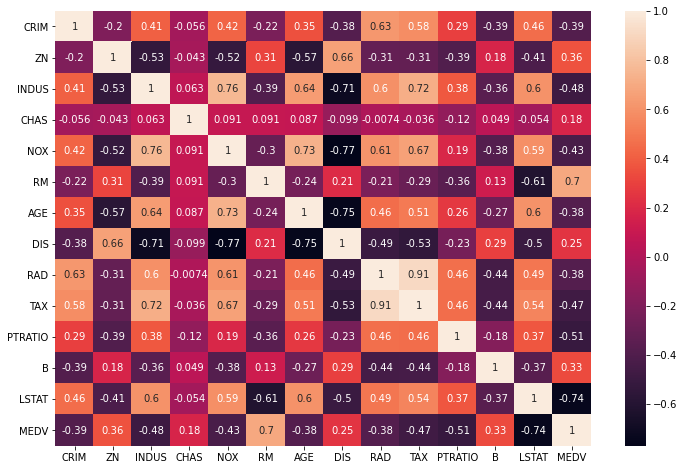

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(BostonData.corr(),annot=True)

* Observation: 
    1. LSTAT,RM have very high correlation with the output variable, followed by PTRATIO, INDUS, TAX, NOX parameters. 

#### b. Viewing distributions of all features

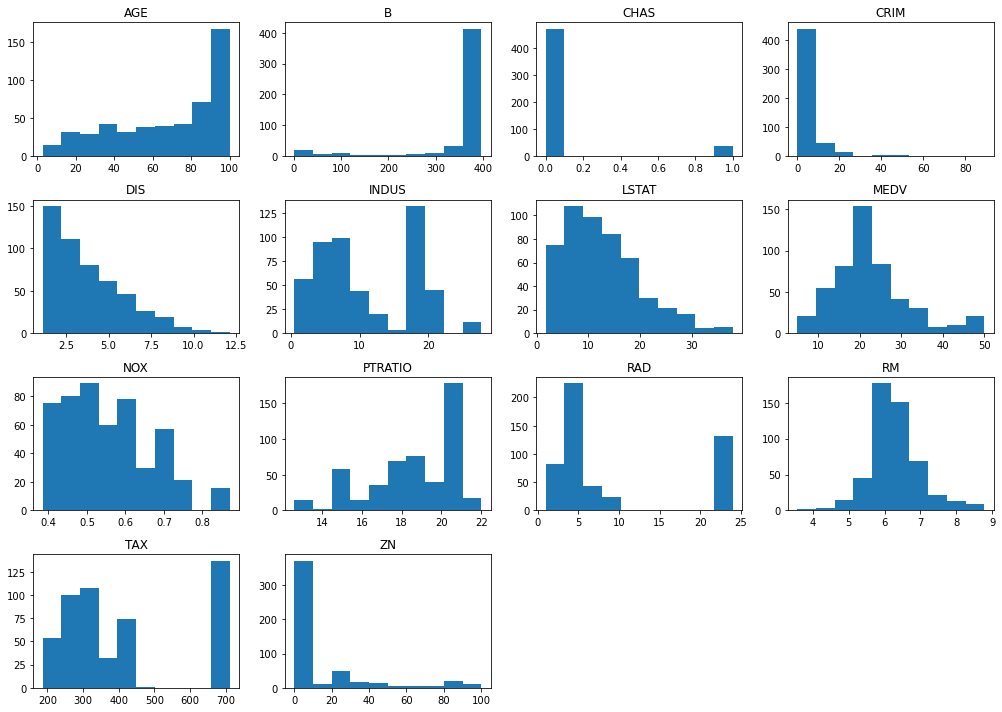

In [39]:
BostonData.hist(grid=False,figsize=(14,10))
plt.tight_layout()

#### Summary: 
* At this point, it is definitely required to remove the binary category variable CHAS. 
* As for the rest of the features, we let them be and see how they emerge in the models. 


In [40]:
X_features = X_Boston.drop('CHAS',axis=1)

In [41]:
X_features.shape

(506, 12)

* What we also do is remove target prices of value 50, as that seems to be the cap and hence some outlier features might be due to this

In [42]:
BostonData.drop(BostonData[BostonData['MEDV'] == 50.0].index,inplace=True)


In [43]:
BostonData

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [44]:
X_Boston = BostonData.drop('MEDV',axis=1)
y_Boston = BostonData['MEDV']

### 5. Models

Trying a couple of models (with the default settings)
    1. Linear Regression
    2. Ridge Regression 
    3. Lasso Regression 
    4. Random Forest Regression 
    5. Gradient Boost Regression 
    6. XG Boost Regression 

Steps: 
    1. Split data in train and test
    2. Do 5 fold cross validation in the training data and get scores for various metrics. 
    3. Compare scores of various methods and evaluate. 
    
Regression Metrics computed here:
    1. R2
    2. R2 Adjusted
    3. MSE
    4. MAE


In [45]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_Boston,y_Boston,test_size = 0.2,random_state = 0)

In [50]:
trainscores_R2 = []
trainscores_MAE = []
trainscores_MSE = []
trainscores_R2adj = []

testscores_R2 = []
testscores_MAE = []
testscores_MSE = []
testscores_R2adj = []

scaler = MinMaxScaler()

Models = [LinearRegression(),Ridge(),Lasso(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),XGBRegressor()]

for model in Models:
    modelitn = model
    modelwithpipeline = make_pipeline(scaler,modelitn)
    modelwithpipeline.fit(X_train,y_train)
    r2_train = cross_val_score(modelwithpipeline,X_train,y_train,cv=5,scoring='r2')
    trainscores_R2.append(r2_train)
    trainscores_MAE.append(cross_val_score(modelwithpipeline,X_train,y_train,cv=5,scoring='neg_mean_absolute_error'))
    trainscores_MSE.append(cross_val_score(modelwithpipeline,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    
    adjusted_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    trainscores_R2adj.append(adjusted_r2_train)
    
    r2_test = r2_score(y_test,modelwithpipeline.predict(X_test))
    testscores_R2.append(r2_test)
    testscores_MAE.append(mean_absolute_error(y_test,modelwithpipeline.predict(X_test)))
    testscores_MSE.append(mean_squared_error(y_test,modelwithpipeline.predict(X_test)))

    adjusted_r2_test = 1 - (1 - r2_test)*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
    testscores_R2adj.append(adjusted_r2_test)
    

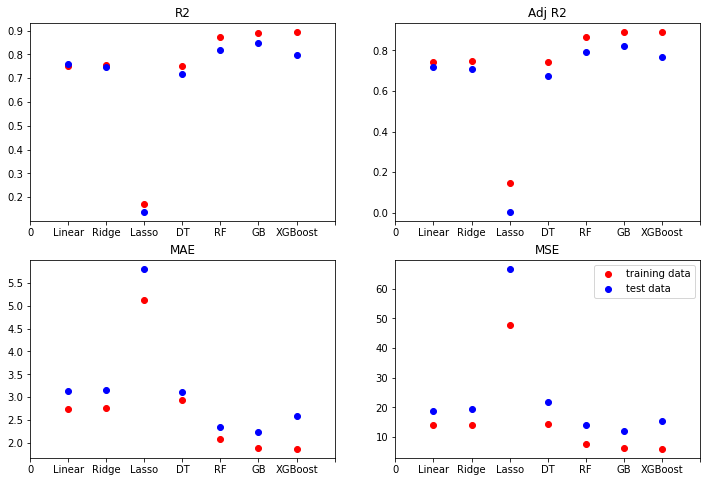

In [24]:
names = [0, 'Linear','Ridge','Lasso','DT','RF','GB','XGBoost']

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title('R2')
plt.plot(np.mean(trainscores_R2,axis=1),'ro')
plt.plot(testscores_R2,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)

plt.subplot(2,2,2)
plt.title('Adj R2')
plt.plot(np.mean(trainscores_R2adj,axis=1),'ro')
plt.plot(testscores_R2adj,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)

plt.subplot(2,2,3)
plt.title('MAE')
plt.plot(-np.mean(trainscores_MAE,axis=1),'ro')
plt.plot(testscores_MAE,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)

plt.subplot(2,2,4)
plt.title('MSE')
plt.plot(-np.mean(trainscores_MSE,axis=1),'ro')
plt.plot(testscores_MSE,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)

plt.legend(['training data','test data'],loc = "best")

# https://stackoverflow.com/questions/56746148/how-to-change-xticks-with-matplotlib/56746205 Ref for x ticks 

* Random Forest, Gradient Boosting Regressor & XGBoost Regressor are better models for the data as compared to the linear regression models. Depending on the exact eval metric chosen the best model among the ensemble methods would differ. 

* All models for each of the metrics have quite some variation between train and test scores indicating overfitting. 

* Overall Gradient Boost technique seems to be doing well in test data score for each of the metrics. Some fine tuning could be done to reduce overfitting. 


### 6. Prediction

Text(0, 0.5, 'predicted price of house')

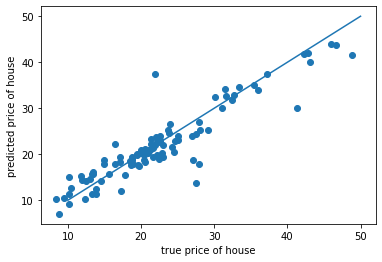

In [76]:
model = GradientBoostingRegressor()
X_train_scaled = scaler.fit_transform(X_train)
model.fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(X_test)
plt.scatter(x=y_test,y = model.predict(X_test_scaled))
xrange = np.linspace(10,50,50)
plt.plot(xrange,xrange)
plt.xlabel('true price of house')
plt.ylabel('predicted price of house')

* Except for a few outliers in the 20-30 range, there seems to be a little under prediction at the higher price range (> 45). 
* Overall the prediction seems to be ok. 

### Variable importance 

In [77]:
model.feature_importances_

array([5.01126488e-02, 7.83846775e-04, 6.01425820e-03, 6.17938858e-05,
       1.85563643e-02, 2.75703229e-01, 1.06621774e-02, 3.02054481e-02,
       1.98200293e-03, 2.08950741e-02, 4.42015930e-02, 1.13179573e-02,
       5.29503606e-01])

### 6. (Optional) Model tuning to reduce overfitting: 

In [78]:
#todo: 

### 7. Summary 
    1. The dataset consists of features related to predicting prices of houses in Boston.
    2. Out of the 13 features, a binary categorical feature is removed from later analysis. 
    3. There are no missing or duplicate values in the dataset. The output variable (MEDV) seems to be capped at    50. Hence we remove data corresponding to value 50 as it might contain outlier features. 
    4. We try out a bunch of models with their default settings on 5 fold cross validation on training data (80% of total data) and then look at the prediction score on test data (remaining 20% data).
    5. We compute 4 different eval metrics for each of the models : 
        i. R2
        ii. Adjusted R2
        iii. MSE (Mean Squared Error) 
        iv. MAE (Mean Absolute Error)
    6. Of the models tried; Linear Models (Least Squares, Lasso, Ridge) &  Ensemble method (Random forest, Gradient Boosted Regression, Extreme Gradient Boosted Regression), Ensemble models have better results overall. 
    7. Some overfitting seems to be present in each model with the default settings, hence tuning to reduce overfitting would be required. 
    8. TODO: Tuning of Gradient model